In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
layout = pd.read_csv('/home/michael/Documents/brfss2016_layout.csv',
                    names=['StartCol', 'Name', 'Length'])
keep_columns = ['_STATE', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', '_PHYS14D', '_MENT14D', 'POORHLTH',
               'HLTHPLN1', 'PERSDOC2', 'EDUCA', '_BMI5', '_BMI5CAT', '_RFBMI5',
               '_INCOMG', 'SLEPTIM1', '_SMOKER3', '_RFSMOK3', '_RFDRHV5', 'DRNKANY5', 'EXERANY2']
layout_filtered = layout[layout['Name'].isin(keep_columns)]
colspecs = list(zip(layout_filtered['StartCol'] - 1,
                    layout_filtered['StartCol'] + layout_filtered['Length'] - 1))

In [3]:
df = pd.read_fwf('/home/michael/Documents/LLCP2016.asc', colspecs=colspecs,
                header=None, names=layout_filtered['Name'])
df = df[~df['_STATE'].isin([11, 66, 72, 78])] # Drop DC, Guam, Puerto Rico, Virgin Islands
state_code = np.sort(df['_STATE'].unique())
state_abbrev = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
                'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
                'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
                'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
                'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
state_dict = dict(zip(state_code, state_abbrev))
df['STCODE'] = df['_STATE'].replace(state_dict)

In [5]:
layout11 = pd.read_csv('/home/michael/Documents/brfss2011_layout.csv',
                      names=['StartCol', 'Name', 'Length'])
colspecs = list(zip(layout11['StartCol'] - 1,
                    layout11['StartCol'] + layout11['Length'] - 1))
df11 = pd.read_fwf('/home/michael/Documents/LLCP2011.ASC', colspecs=colspecs,
                header=None, names=layout11['Name'])
df11 = df11[~df11['_STATE'].isin([11, 66, 72])] # Drop DC, Guam, Puerto Rico
df11['STCODE'] = df11['_STATE'].replace(state_dict)

In [6]:
df_16 = df[['GENHLTH', '_INCOMG', 'STCODE', 'SLEPTIM1', '_RFSMOK3', 'DRNKANY5',
             'EXERANY2', '_RFBMI5', '_PHYS14D', '_MENT14D']]
df_16 = df_16[df_16['GENHLTH'].isin([1,2,3,4,5]) &
              df_16['_INCOMG'].isin([1,2,3,4,5]) &
              df_16['_RFSMOK3'].isin([1,2]) &
              df_16['DRNKANY5'].isin([1,2]) &
              df_16['EXERANY2'].isin([1,2])]
df_16['NonSmoker'] = df_16['_RFSMOK3'] == 1
df_16['NonDrinker'] = df_16['DRNKANY5'] == 2
df_16['Exercise'] = df_16['EXERANY2'] == 1
df_16['NotOverweight'] = df_16['_RFBMI5'] == 1

fit_vars = ['NonDrinker', 'NonSmoker', 'NotOverweight', 'Exercise']
agg_5yr = np.zeros((2, len(fit_vars)))

print('\n2016:')
col = 0
for var in fit_vars:
    truelevel = np.mean(df_16['GENHLTH'][df_16[var] == True])
    falselevel = np.mean(df_16['GENHLTH'][df_16[var] == False])
    print('Mean GENHLTH for {} = True: {}'.format(var, truelevel))
    print('Mean GENHLTH for {} = False: {}'.format(var, falselevel))
    print('Difference = {}'.format(falselevel - truelevel))
    agg_5yr[1, col] = falselevel - truelevel
    col += 1
    
df_11 = df11[['GENHLTH', '_INCOMG', 'STCODE', '_RFSMOK3', 'DRNKANY5',
             'EXERANY2', '_RFBMI5']]
df_11 = df_11[df_11['GENHLTH'].isin([1,2,3,4,5]) &
              df_11['_INCOMG'].isin([1,2,3,4,5]) &
              df_11['_RFSMOK3'].isin([1,2]) &
              df_11['DRNKANY5'].isin([1,2]) &
              df_11['EXERANY2'].isin([1,2])]
df_11['NonSmoker'] = df_11['_RFSMOK3'] == 1
df_11['NonDrinker'] = df_11['DRNKANY5'] == 2
df_11['Exercise'] = df_11['EXERANY2'] == 1
df_11['NotOverweight'] = df_11['_RFBMI5'] == 1

print('\n2011:')
col = 0
for var in fit_vars:
    truelevel = np.mean(df_11['GENHLTH'][df_11[var] == True])
    falselevel = np.mean(df_11['GENHLTH'][df_11[var] == False])
    print('Mean GENHLTH for {} = True: {}'.format(var, truelevel))
    print('Mean GENHLTH for {} = False: {}'.format(var, falselevel))
    print('Difference = {}'.format(falselevel - truelevel))
    agg_5yr[0, col] = falselevel - truelevel
    col += 1


2016:
Mean GENHLTH for NonDrinker = True: 2.7959100905378
Mean GENHLTH for NonDrinker = False: 2.3454078526113173
Difference = -0.4505022379264827
Mean GENHLTH for NonSmoker = True: 2.483533283721973
Mean GENHLTH for NonSmoker = False: 2.944956041282969
Difference = 0.46142275756099593
Mean GENHLTH for NotOverweight = True: 2.3085063710303744
Mean GENHLTH for NotOverweight = False: 2.6634817584669617
Difference = 0.3549753874365873
Mean GENHLTH for Exercise = True: 2.3692626757071933
Mean GENHLTH for Exercise = False: 3.1258247294237456
Difference = 0.7565620537165523

2011:
Mean GENHLTH for NonDrinker = True: 3.1661939099825704
Mean GENHLTH for NonDrinker = False: 2.6925486919743093
Difference = -0.4736452180082611
Mean GENHLTH for NonSmoker = True: 2.9329007818167163
Mean GENHLTH for NonSmoker = False: 2.8002230275996656
Difference = -0.13267775421705075
Mean GENHLTH for NotOverweight = True: 2.7627157564392055
Mean GENHLTH for NotOverweight = False: 2.9827919100255826
Difference = 

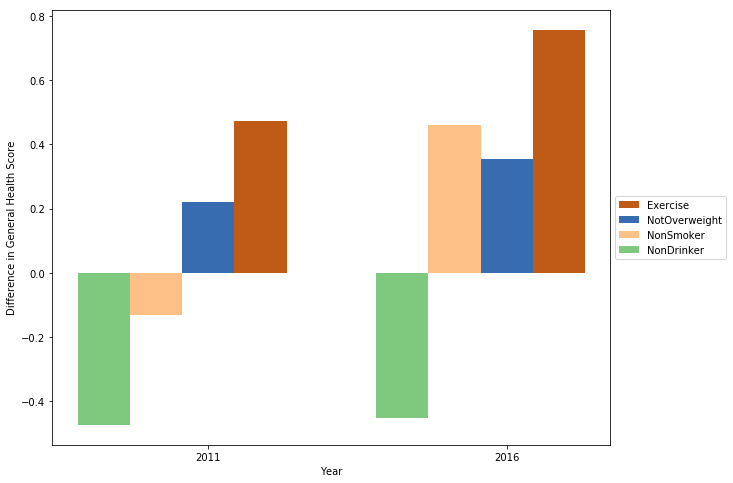

In [11]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

space = 0.3

conditions = fit_vars
categories = ['2011', '2016']

n = len(conditions)

width = (1 - space) / (len(conditions))

for i, cond in enumerate(conditions):
    vals = agg_5yr[:, i]
    pos = [j - (1 - space) / 2. + i * width for j in range(1, len(categories)+1)]
    ax.bar(pos, vals, width=width, label=cond, color=cm.Accent(float(i) / n))

ax.set_xticks(range(1, len(categories)+1))
ax.set_xticklabels(categories)
ax.set_xlabel('Year')
ax.set_ylabel('Difference in General Health Score')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()